In [23]:
%matplotlib inline

# numbers
import numpy as np
import pandas as pd

# stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# learn you some machines
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# plots
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import seaborn as sns

# utils
import os, re
from pprint import pprint


In [24]:
testing_df = pd.read_csv('data/optdigits/optdigits.tes',header=None)
X_testing,  y_testing  = testing_df.loc[:,0:63],  testing_df.loc[:,64]

training_df = pd.read_csv('data/optdigits/optdigits.tra',header=None)
X_training, y_training = training_df.loc[:,0:63], training_df.loc[:,64]

In [1]:
mat = X_training.loc[0,:].reshape(8,8)
print mat
plt.imshow(mat)
gca().grid(False)
plt.show()

NameError: name 'X_training' is not defined

In [26]:
def get_normed_mean_cov(X):
    X_std = StandardScaler().fit_transform(X)
    X_mean = np.mean(X_std, axis=0)
    
    ## Automatic:
    #X_cov = np.cov(X_std.T)
    
    # Manual:
    X_cov = (X_std - X_mean).T.dot((X_std - X_mean)) / (X_std.shape[0]-1)
    
    return X_std, X_mean, X_cov

X_std, X_mean, X_cov = get_normed_mean_cov(X_training)

## Classification

We previously used PCA to classify the data, let's compare it to random forests as an alternative classification technique.

In [57]:
# check performance of random forest classifier, 
# as function of number of estimators 
# here we only take 1000 data points to train

#n_estimators_array = np.array([1,5,10,50,100,200,500])
n_estimators_array = np.array( [j+1 for j in range(32)] )
n_samples = 10
n_grid = len(n_estimators_array)
score_array_mu = np.zeros(n_grid)
score_array_sigma = np.zeros(n_grid)
j=0
for n_estimators in n_estimators_array:
    score_array=np.zeros(n_samples)
    for i in range(0,n_samples):
        clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        score_array[i] = evaluate_classifier(clf, X_training.iloc[0:1000], y_training.iloc[0:1000], 0.8)
    score_array_mu[j], score_array_sigma[j] = np.mean(score_array), np.std(score_array)
    j=j+1

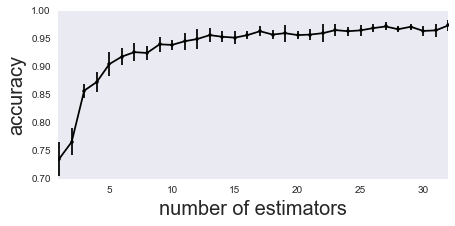

In [59]:
figure(figsize=(7,3))
errorbar(n_estimators_array, score_array_mu, 
         yerr=score_array_sigma, 
         fmt='k.-')
#xscale("log")
xlabel("number of estimators",size = 20)
ylabel("accuracy",size = 20)
xlim(0.9,32)
grid(which="both")

Feature ranking:
1. feature 42 (0.060170)
2. feature 21 (0.047480)
3. feature 18 (0.038207)
4. feature 10 (0.036866)
5. feature 30 (0.034957)
6. feature 43 (0.034106)
7. feature 20 (0.033436)
8. feature 60 (0.031545)
9. feature 28 (0.030363)
10. feature 26 (0.029846)


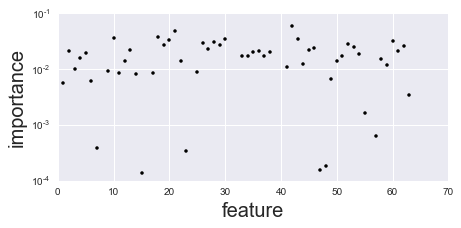

In [60]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(0,10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances

figure(figsize=(7,3))
plot(indices[:],importances[indices[:]],'k.')
yscale("log")
xlabel("feature",size=20)
ylabel("importance",size=20)

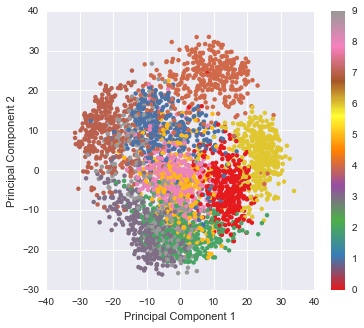

In [61]:
pca = PCA(n_components=2)
pca.fit(X_training)
transform = pca.transform(X_training)

figure(figsize=(6,5))
plt.scatter(transform[:,0],transform[:,1], 
            s=20, c = y_training, cmap = "Set1", 
            edgecolor = "None")
plt.colorbar()
clim(0,9)

xlabel("Principal Component 1")
ylabel("Principal Component 2")
show()

In [62]:
n_components_array=([1,2,3,4,5,10,20,50])
vr = np.zeros(len(n_components_array))
i=0;
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(X_training)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1

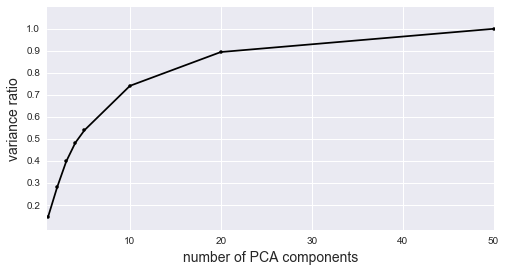

In [68]:
figure(figsize=(8,4))
plot(n_components_array,vr,'k.-')
#xscale("log")
ylim(9e-2,1.1)
yticks(np.linspace(0.2,1.0,9))
xlim(0.9)
xlabel("number of PCA components",size=14)
ylabel("variance ratio",size=14)

In [ ]:
pca = PCA(n_components=50)
pca.fit(X_training)
transform_train = pca.transform(X_training)
transform_test = pca.transform(X_testing)

clf = KNeighborsClassifier()
clf.fit(transform_train, y_training)
yhat_testing = clf.predict(transform_test)

In [69]:
import sklearn.metrics import confusion_matrix
cm = confusion_matrix(yhat_testing, y_testing)
sns.heatmap(cm)}

In [76]:
corr = (results==y_testing).sum()
incorr = (results<>y_testing).sum()
print "Correct: %d"%(corr)
print "Incorrect: %d"%(incorr)
print "Accuracy: %0.4f"%(corr*1.0/(corr+incorr))

Correct: 1758
Incorrect: 39
Accuracy: 0.9783
